## K-means Algorithm
- Clustering Algorithm: 여러개의 데이터를 군집화하는 것
- 대표적인 Unsupervised Learning Algorithm

## K-means 사전 준비
- 클러스터링을 수행할 데이터의 주제를 결정( 수학 학원에서 학생들의 성적에 따라 반을 구분하기)
- 얼마나 많은 클러스터를 만들지 고민해야한다.( 고급반, 중급반, 초급반, ...)
- 데이터를 준비한다. (데이터가 정확할수록 유리)
- 클러스터링을 수행하기 위한 방법은 다양 ( 무작위 중심(Centroid) 값 선택, K-means++,...)

## K-means 수행 과정
- 1. 중심(Centroid)에 가까운 데이터를 클러스터에 포함시킨다.
- 2. 중심(Centroid)을 클러스터의 중앙으로 이동시킨다.

K-means는 위 두 과정을 반복 수행하면 된다. 결과적으로 완전하게 군집화된 클러스터들을 얻을 수 있다.
더이상 중심(Centroid)의 위치가 변하지 않을 때까지 반복하는 것이 일반적

## K-means 실습

In [1]:
from sklearn.cluster import KMeans

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

/home/fwani/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [50]:
df = pd.DataFrame(columns=['x','y'])

In [51]:
df.loc[0] = [2,3]
df.loc[1] = [2,11]
df.loc[2] = [2,18]
df.loc[3] = [4,5]
df.loc[4] = [4,7]
df.loc[5] = [5,3]
df.loc[6] = [5,15]
df.loc[7] = [6,6]
df.loc[8] = [6,8]
df.loc[9] = [6,9]

df.loc[10] = [7,2]
df.loc[11] = [7,4]
df.loc[12] = [7,5]
df.loc[13] = [7,17]
df.loc[14] = [7,18]
df.loc[15] = [8,5]
df.loc[16] = [8,4]
df.loc[17] = [9,10]
df.loc[18] = [9,11]
df.loc[19] = [9,15]

df.loc[20] = [9,19]
df.loc[21] = [10,5]
df.loc[22] = [10,8]
df.loc[23] = [10,18]
df.loc[24] = [12,6]
df.loc[25] = [13,5]
df.loc[26] = [14,11]
df.loc[27] = [15,6]
df.loc[28] = [15,18]
df.loc[29] = [18,12]

In [52]:
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


Text(0.3,0.5,'y')

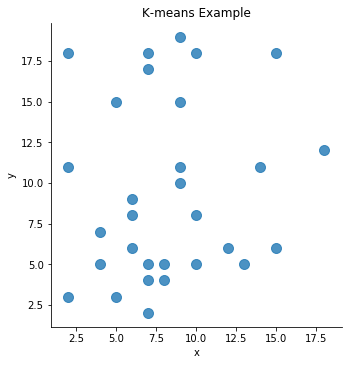

In [53]:
sb.lmplot('x','y',data=df, fit_reg=False, scatter_kws={'s':100})  # scatter_kws = 시각화를 했을때 찍히는 점의 크기
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')

In [54]:
df.values

array([[2, 3],
       [2, 11],
       [2, 18],
       [4, 5],
       [4, 7],
       [5, 3],
       [5, 15],
       [6, 6],
       [6, 8],
       [6, 9],
       [7, 2],
       [7, 4],
       [7, 5],
       [7, 17],
       [7, 18],
       [8, 5],
       [8, 4],
       [9, 10],
       [9, 11],
       [9, 15],
       [9, 19],
       [10, 5],
       [10, 8],
       [10, 18],
       [12, 6],
       [13, 5],
       [14, 11],
       [15, 6],
       [15, 18],
       [18, 12]], dtype=object)

In [55]:
points = df.values
kmeans = KMeans(n_clusters=4).fit(points)
kmeans.cluster_centers_

array([[  5.83333333,   5.08333333],
       [  6.375     ,  16.375     ],
       [ 15.66666667,  13.66666667],
       [ 11.14285714,   7.28571429]])

In [60]:
help(kmeans)

Help on KMeans in module sklearn.cluster.k_means_ object:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time 

In [56]:
kmeans.labels_

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 3, 3,
       1, 3, 3, 2, 3, 2, 2], dtype=int32)

In [57]:
df['cluster'] = kmeans.labels_
df

,x,y,cluster
0,2,3,0
1,2,11,1
2,2,18,1
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,1
7,6,6,0
8,6,8,0
9,6,9,0


Text(27.1768,0.5,'y')

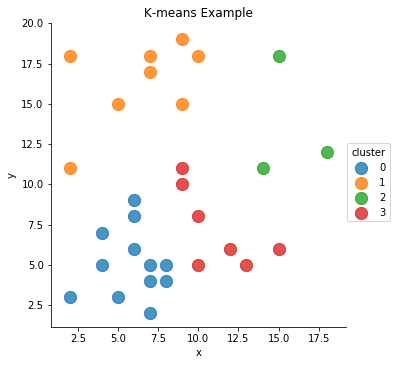

In [58]:
sb.lmplot('x','y',data=df, fit_reg=False, scatter_kws={'s':150}, hue='cluster')  # scatter_kws = 시각화를 했을때 찍히는 점의 크기
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')